# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


- Ficou um pouco confuso se devo reproduzir a relação da **tip_pct** * **net_bill** que resulta justamente no valor real da gorjeta, mas assumi que é para considerar como variável explicativa a net_bill e como preditiva a tip_pct

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.52e-06
Time:                        16:06:19   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

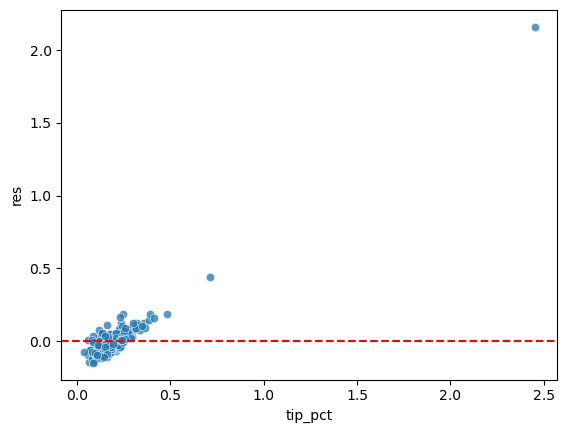

In [15]:
reg = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y='res', data=tips, alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

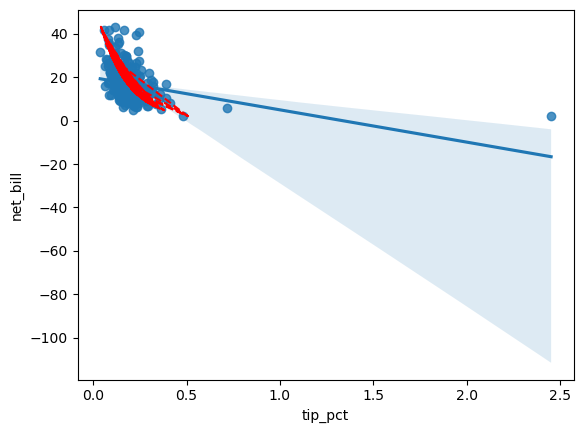

In [57]:
sns.regplot(x=tips['tip_pct'], y=tips['net_bill'])
plt.plot(reg.fittedvalues,tips['net_bill'], 'r,--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.62e-13
Time:                        16:24:42   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

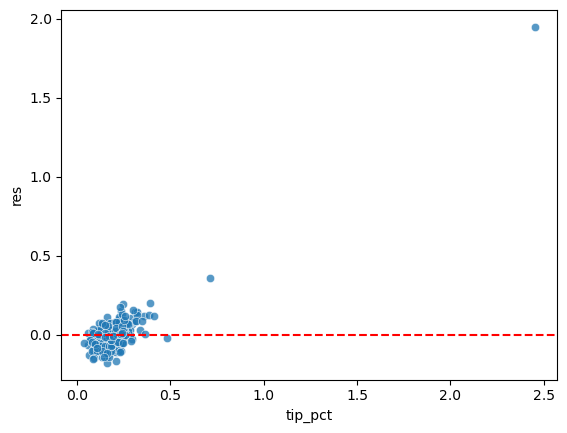

In [46]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y='res', data=tips, alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

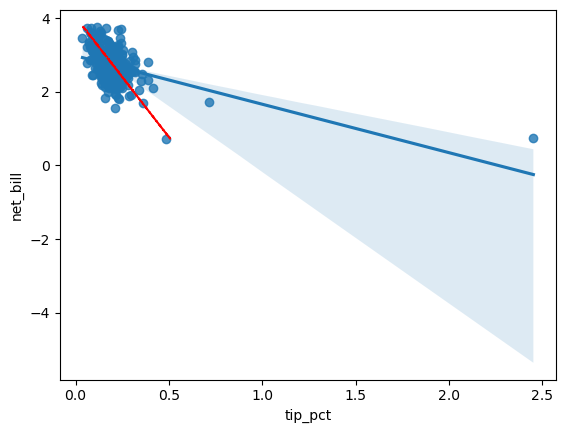

In [56]:
sns.regplot(x=tips['tip_pct'], y=np.log(tips['net_bill']))
plt.plot( reg.fittedvalues, np.log(tips['net_bill']),'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           1.06e-09
Time:                        16:11:51   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.48

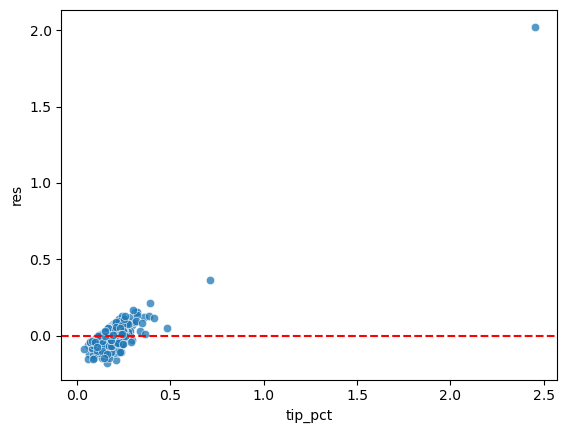

In [23]:
reg = smf.ols('tip_pct ~ net_bill + np.power(net_bill,2)', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y='res', data=tips, alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           8.27e-16
Time:                        16:13:59   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

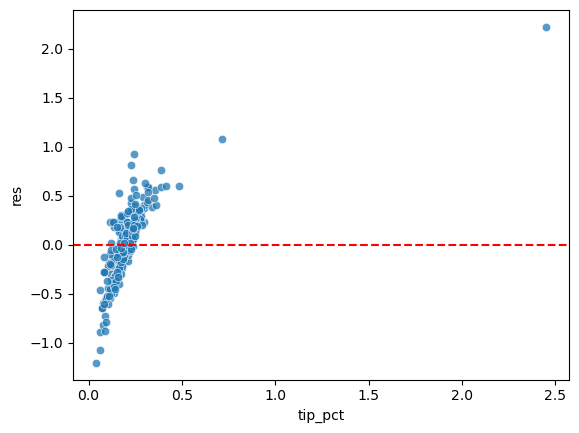

In [25]:
reg = smf.ols('np.log(tip_pct) ~ net_bill ', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y='res', data=tips, alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

In [31]:
tips['predict_y'] = np.exp(reg.fittedvalues)
tips[['predict_y','net_bill']].corr().iloc[0,1]**2

0.9816827488318459

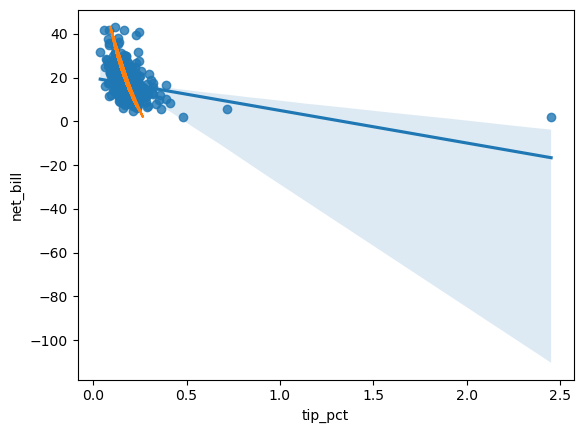

In [35]:
sns.regplot(x=tips['tip_pct'], y=tips['net_bill'])
plt.plot(tips['predict_y'],tips['net_bill'])

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Mon, 23 Oct 2023   Prob (F-statistic):           5.20e-20
Time:                        16:34:41   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

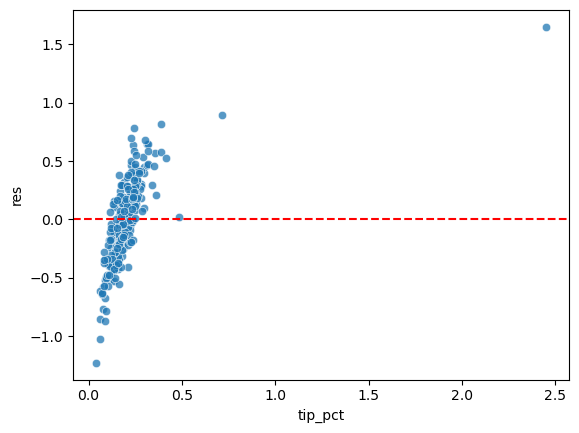

In [59]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill) ', data = tips).fit()
print(reg.summary())

tips['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y='res', data=tips, alpha=0.75)
plt.axhline(y=0, color='r',linestyle='--')

In [60]:
tips['predict_y'] = np.exp(reg.fittedvalues)
tips[['predict_y','net_bill']].corr().iloc[0,1]**2

0.7148737038688945

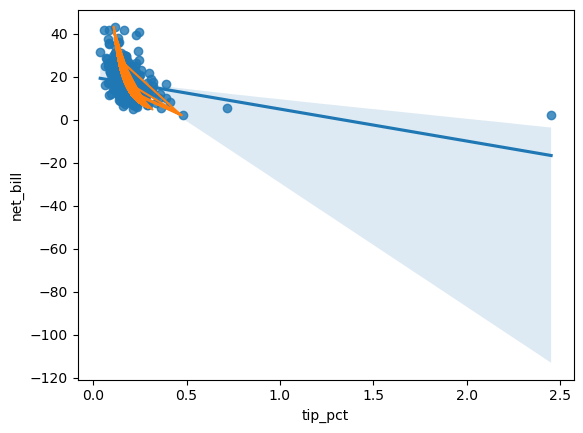

In [61]:
sns.regplot(x=tips['tip_pct'], y=tips['net_bill'])
plt.plot(tips['predict_y'],tips['net_bill'])

###  6. qual modelo resultou no melhor ajuste?

- Eu não sei se o cálculo do r2 verdadeiro no tópico 4 está correto, mas considerando o dado pelo summary, o melhor modelo apresentado é aquele que foi realizado duas transformações logarítmas nas variáveis dependentes e independentes.
- Caso haja algum erro na forma como expressar corretamente o R2, por favor retornar como expressar de forma correta no python.